In [19]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer


In [20]:
df = pd.read_csv('drug200.csv')
print(df.head())  

   Age Sex      BP Cholesterol  Na_to_K   Drug
0   23   F    HIGH        HIGH   25.355  DrugY
1   47   M     LOW        HIGH   13.093  drugC
2   47   M     LOW        HIGH   10.114  drugC
3   28   F  NORMAL        HIGH    7.798  drugX
4   61   F     LOW        HIGH   18.043  DrugY


In [21]:
print(df.isnull().sum())

Age            0
Sex            0
BP             0
Cholesterol    0
Na_to_K        0
Drug           0
dtype: int64


In [22]:
imp = SimpleImputer(strategy = "median")
X = imp.fit_transform(X)
X[0]

array([-1.29159102,  0.        ,  0.        ,  0.        ,  1.28652212])

In [23]:
label_encoder = LabelEncoder()

df['Sex'] = label_encoder.fit_transform(df['Sex'])

df['BP'] = label_encoder.fit_transform(df['BP'])

df['Cholesterol'] = label_encoder.fit_transform(df['Cholesterol'])

df['Drug'] = label_encoder.fit_transform(df['Drug'])


In [24]:
df[['Age', 'Na_to_K']] = scaler.fit_transform(df[['Age', 'Na_to_K']])


In [25]:
X = df.drop('Drug', axis=1)
y = df['Drug']

In [26]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=13)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")

Training data shape: (150, 5)
Testing data shape: (50, 5)


In [27]:
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)
X_train[0]

array([-0.53522933, -1.09812675, -1.06510353, -0.97367959, -0.38802335])

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense

model = Sequential()
model.add(Dense(6, activation = 'relu', input_dim = X_train.shape[1]))
model.add(Dense(6, activation = 'relu'))
model.add(Dense(1, activation = 'sigmoid'))

model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(X_train, y_train, batch_size = 32, epochs = 25 , validation_split=0.15)

Epoch 1/25


/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


4/4 ━━━━━━━━━━━━━━━━━━━━ 1s 68ms/step - accuracy: 0.4765 - loss: 0.7150 - val_accuracy: 0.3913 - val_loss: 0.7284
Epoch 2/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4849 - loss: 0.6231 - val_accuracy: 0.3913 - val_loss: 0.6673
Epoch 3/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4745 - loss: 0.5462 - val_accuracy: 0.3913 - val_loss: 0.6041
Epoch 4/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.4912 - loss: 0.6063 - val_accuracy: 0.3913 - val_loss: 0.5427
Epoch 5/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5089 - loss: 0.5338 - val_accuracy: 0.3913 - val_loss: 0.4834
Epoch 6/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4412 - loss: 0.4386 - val_accuracy: 0.3913 - val_loss: 0.4240
Epoch 7/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.4839 - loss: 0.3280 - val_accuracy: 0.3478 - val_loss: 0.3669
Epoch 8/25
4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step - accuracy: 0.5276 - loss: 0.3074 - val_accuracy: 0.3478 - val_loss: 0.3088
Epoch 9/25


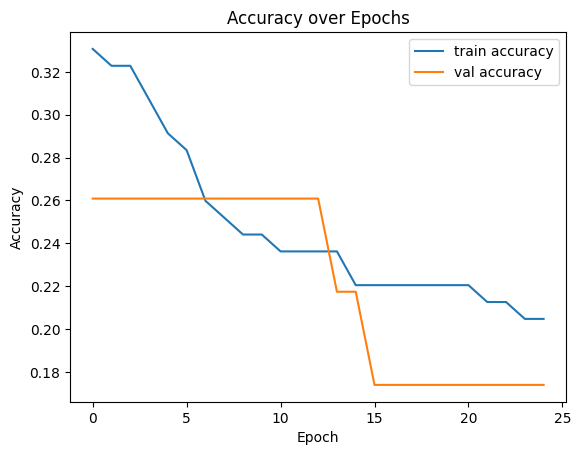

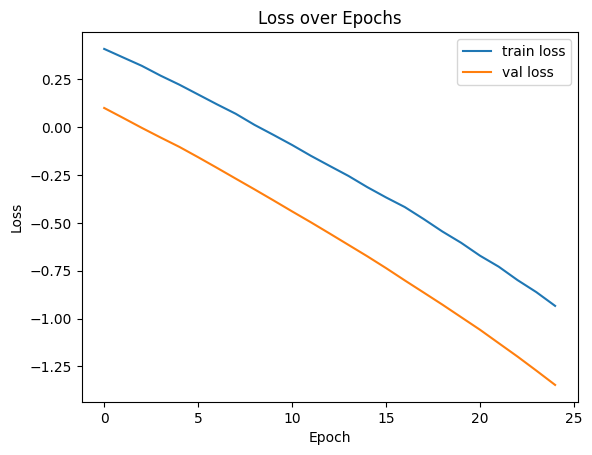

In [31]:
import matplotlib.pyplot as plt

# Plot accuracy over epochs
plt.plot(history.history['accuracy'], label='train accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

# Plot loss over epochs
plt.plot(history.history['loss'], label='train loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss over Epochs')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [32]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy = ",test_accuracy)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.1321 - loss: -0.3201
Test Accuracy =  0.11999999731779099


In [33]:
# Make predictions
from sklearn.metrics import accuracy_score, confusion_matrix
y_pred = (model.predict(X_test) > 0.5).astype(int)

# accuracy score
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy = ",accuracy)

# Confusion matrix
CM = confusion_matrix(y_test, y_pred)
print("Confusion Matrix ....\n ",CM)

2/2 ━━━━━━━━━━━━━━━━━━━━ 0s 76ms/step
Accuracy =  0.12
Confusion Matrix ....
  [[ 2 25  0  0  0]
 [ 0  4  0  0  0]
 [ 0  4  0  0  0]
 [ 0  5  0  0  0]
 [ 0 10  0  0  0]]
